https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [40]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [41]:
dataframe = pd.read_csv("AirPassengers.csv")
display(dataframe)
passengerNums = dataframe["#Passengers"].values
passengerNums = passengerNums.astype('float32') # NNs works better with floats
passengerNums = passengerNums.reshape(-1,1)
print("Passenger values")
print(passengerNums)
print("Type of passengerNums")
print(type(passengerNums))
print("Size of passengerNums")
print(passengerNums.shape)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Passenger values
[[112.]
 [118.]
 [132.]
 [129.]
 [121.]
 [135.]
 [148.]
 [148.]
 [136.]
 [119.]
 [104.]
 [118.]
 [115.]
 [126.]
 [141.]
 [135.]
 [125.]
 [149.]
 [170.]
 [170.]
 [158.]
 [133.]
 [114.]
 [140.]
 [145.]
 [150.]
 [178.]
 [163.]
 [172.]
 [178.]
 [199.]
 [199.]
 [184.]
 [162.]
 [146.]
 [166.]
 [171.]
 [180.]
 [193.]
 [181.]
 [183.]
 [218.]
 [230.]
 [242.]
 [209.]
 [191.]
 [172.]
 [194.]
 [196.]
 [196.]
 [236.]
 [235.]
 [229.]
 [243.]
 [264.]
 [272.]
 [237.]
 [211.]
 [180.]
 [201.]
 [204.]
 [188.]
 [235.]
 [227.]
 [234.]
 [264.]
 [302.]
 [293.]
 [259.]
 [229.]
 [203.]
 [229.]
 [242.]
 [233.]
 [267.]
 [269.]
 [270.]
 [315.]
 [364.]
 [347.]
 [312.]
 [274.]
 [237.]
 [278.]
 [284.]
 [277.]
 [317.]
 [313.]
 [318.]
 [374.]
 [413.]
 [405.]
 [355.]
 [306.]
 [271.]
 [306.]
 [315.]
 [301.]
 [356.]
 [348.]
 [355.]
 [422.]
 [465.]
 [467.]
 [404.]
 [347.]
 [305.]
 [336.]
 [340.]
 [318.]
 [362.]
 [348.]
 [363.]
 [435.]
 [491.]
 [505.]
 [404.]
 [359.]
 [310.]
 [337.]
 [360.]
 [342.]
 [406.]

In [42]:
# scaling is important in LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(passengerNums)
print(data_scaled)
print(len(data_scaled))

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [43]:
# split train(70%) and test(30%) data 
testsize = int(len(data_scaled)*0.3) #43
trainSet = data_scaled[:-testsize,:]
testSet = data_scaled[-testsize:,:]
print("Train Set")
print(trainSet)
print(len(trainSet))
print("Test Set")
print(testSet)
print(len(testSet))

Train Set
[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.191119

In [44]:
def create_dataset(df, n_monhts=1):
    dataX = []
    dataY = []
    for i in range(len(df)-n_monhts-1):
        item = df[i:i+n_months,0]
        print("item: ",item)
        dataX.append(item)
        dataY.append(df[i+n_months,0])
    return np.array(dataX), np.array(dataY)
    

In [45]:
n_months = 3
n_features = 1
X_train, y_train = create_dataset(trainSet, n_months)
X_test, y_test = create_dataset(testSet, n_months)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train.shape)
# print("X train[0]:")
# print(X_train)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

item:  [0.01544401 0.02702703 0.05405405]
item:  [0.02702703 0.05405405 0.04826255]
item:  [0.05405405 0.04826255 0.03281853]
item:  [0.04826255 0.03281853 0.05984557]
item:  [0.03281853 0.05984557 0.08494207]
item:  [0.05984557 0.08494207 0.08494207]
item:  [0.08494207 0.08494207 0.06177607]
item:  [0.08494207 0.06177607 0.02895753]
item:  [0.06177607 0.02895753 0.        ]
item:  [0.02895753 0.         0.02702703]
item:  [0.         0.02702703 0.02123553]
item:  [0.02702703 0.02123553 0.04247104]
item:  [0.02123553 0.04247104 0.07142857]
item:  [0.04247104 0.07142857 0.05984557]
item:  [0.07142857 0.05984557 0.04054055]
item:  [0.05984557 0.04054055 0.08687258]
item:  [0.04054055 0.08687258 0.12741312]
item:  [0.08687258 0.12741312 0.12741312]
item:  [0.12741312 0.12741312 0.10424709]
item:  [0.12741312 0.10424709 0.05598456]
item:  [0.10424709 0.05598456 0.01930502]
item:  [0.05598456 0.01930502 0.06949806]
item:  [0.01930502 0.06949806 0.07915059]
item:  [0.06949806 0.07915059 0.08

In [46]:
# in format of [samples, time steps, features]
X_train = np.reshape(X_train,(X_train.shape[0], n_months,n_features))
print(X_train[0])
X_test = np.reshape(X_test,(X_test.shape[0], n_months,n_features))

[[0.01544401]
 [0.02702703]
 [0.05405405]]


In [47]:
model = Sequential()
model.add(LSTM(5,input_shape=(n_months,n_features)))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(X_train, y_train, epochs=100,batch_size=1,verbose=1)

Epoch 1/100
97/97 [==============================] - 4s 4ms/step - loss: 0.0223
Epoch 2/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 3/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 4/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 5/100
97/97 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 6/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 7/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 8/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 9/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 10/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 11/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 12/100
97/97 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 13/100
97/97 [=================

In [48]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("Train pred")
print(train_pred)
print("Test pred")
print(test_pred)

2/2 [==============================] - 0s 8ms/step
Train pred
[[0.05167932]
 [0.05431676]
 [0.04407426]
 [0.06010496]
 [0.08311864]
 [0.09048551]
 [0.07528322]
 [0.04657846]
 [0.01686194]
 [0.02711621]
 [0.02635751]
 [0.04294328]
 [0.06838651]
 [0.06776552]
 [0.05355292]
 [0.082803  ]
 [0.12115292]
 [0.1325167 ]
 [0.1179658 ]
 [0.07786795]
 [0.03989556]
 [0.06501529]
 [0.07970444]
 [0.09296402]
 [0.13632286]
 [0.12531249]
 [0.13696592]
 [0.1468215 ]
 [0.18098024]
 [0.18842506]
 [0.16880816]
 [0.13207367]
 [0.09973655]
 [0.11983567]
 [0.13211745]
 [0.14981422]
 [0.17263809]
 [0.16033006]
 [0.16103974]
 [0.21203712]
 [0.24061912]
 [0.26547295]
 [0.22039722]
 [0.18658476]
 [0.1499733 ]
 [0.17409581]
 [0.18170956]
 [0.18498504]
 [0.24483901]
 [0.25425732]
 [0.24901089]
 [0.26843762]
 [0.30269864]
 [0.32046252]
 [0.27130562]
 [0.22597817]
 [0.17046311]
 [0.18953836]
 [0.1966672 ]
 [0.1763899 ]
 [0.24195161]
 [0.2412537 ]
 [0.25445512]
 [0.30042985]
 [0.36489257]
 [0.3603264 ]
 [0.3106941 ]


In [49]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)


In [50]:
trainScore = np.sqrt(mean_squared_error(y_train,train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test,test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.18 RMSE
Test Score: 53.15 RMSE


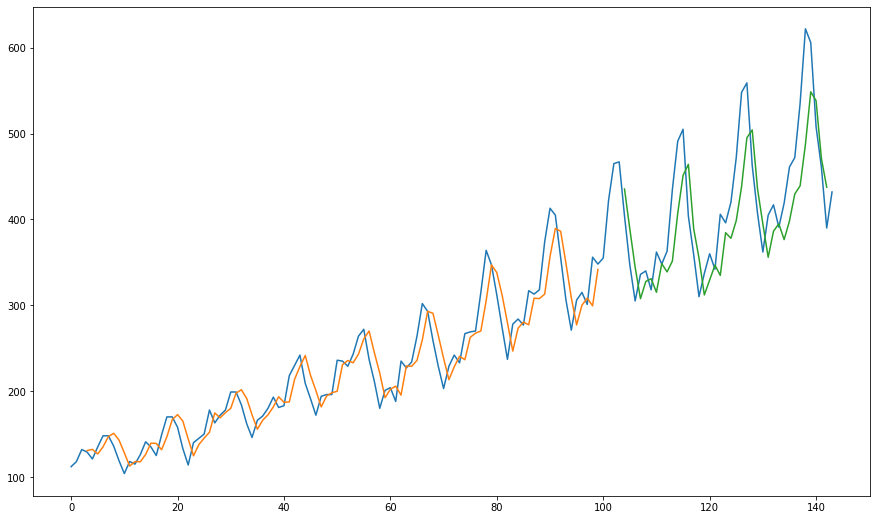

In [51]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_months:len(train_pred)+n_months, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(n_months*2)+1:len(data_scaled)-1, :] = test_pred
# plot baseline and predictions
plt.figure(figsize=(15,9))
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()